In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data_path = '/content/historic.csv'
df = pd.read_csv(data_path)

In [70]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB
None


In [71]:
df.drop(['item_no'], axis=1, inplace=True)

In [72]:
print(df.describe())



             stars
count  8000.000000
mean      3.473075
std       0.978810
min       0.300000
25%       2.800000
50%       3.500000
75%       4.200000
max       6.100000


In [73]:
df.drop_duplicates(inplace=True)


In [74]:
df.describe()

stars
count  3643.000000
mean      3.452621
std       1.033933
min       0.300000
25%       2.700000
50%       3.400000
75%       4.200000
max       6.100000

In [75]:
df.head()

category      main_promotion  color  stars success_indicator
0       Tunic             Catalog  Green    3.1              flop
1      Hoodie  Category_Highlight    Red    1.5              flop
2  Sweatshirt             Catalog    Red    4.4               top
3  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4      Hoodie  Category_Highlight  Green    4.1               top

In [76]:
df.isnull().sum()



category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

In [77]:
unique_categories = df['category'].unique()
unique_promotions = df['main_promotion'].unique()
unique_colors = df['color'].unique()

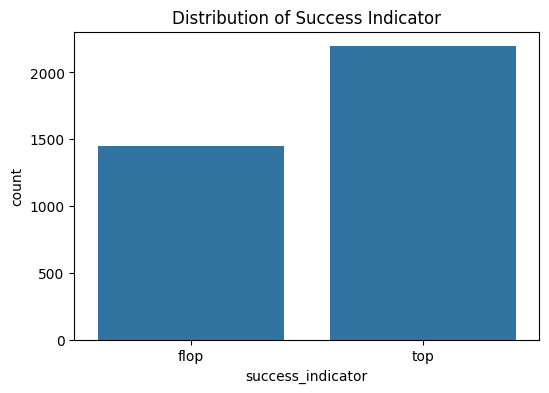

In [78]:
plt.figure(figsize=(6, 4))
sns.countplot(x='success_indicator', data=df)
plt.title('Distribution of Success Indicator')
plt.show()


The graph shows plot of the success of the items that are flopped or topped the chart


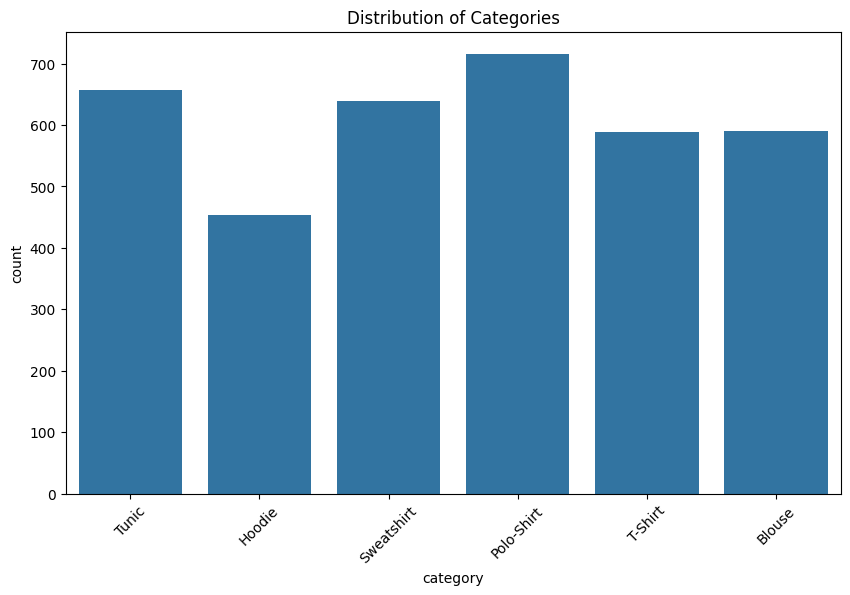

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()

This plot indicates the category of items that are sold

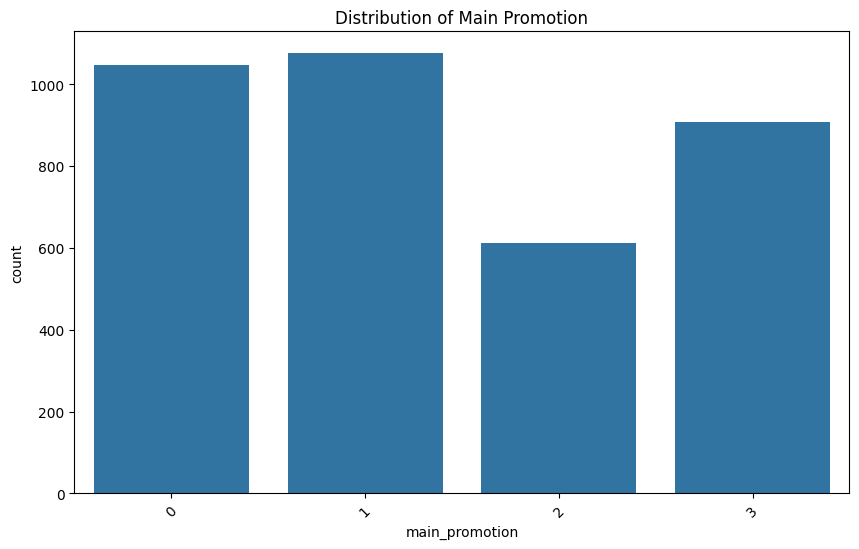

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(x='main_promotion', data=df)
plt.title('Distribution of Main Promotion')
plt.xticks(rotation=45)
plt.show()

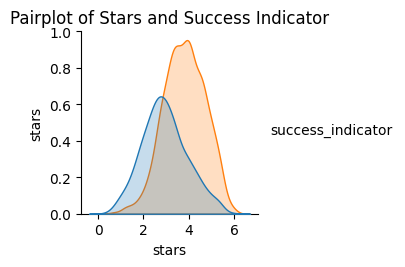

In [81]:
sns.pairplot(df[['stars', 'success_indicator']], hue='success_indicator')
plt.title('Pairplot of Stars and Success Indicator')
plt.show()

The pairplot gives us an idea that the suceess of the sale depends on thre star rating that has bewn provided

<ipython-input-93-ad755c0df492>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['stars'])


<Axes: xlabel='stars', ylabel='Density'>

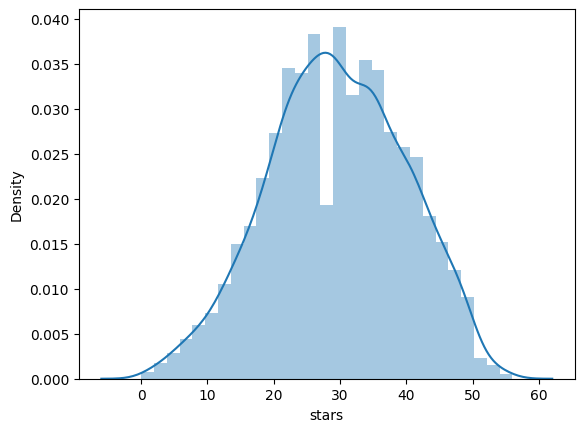

In [93]:
sns.distplot(df['stars'])

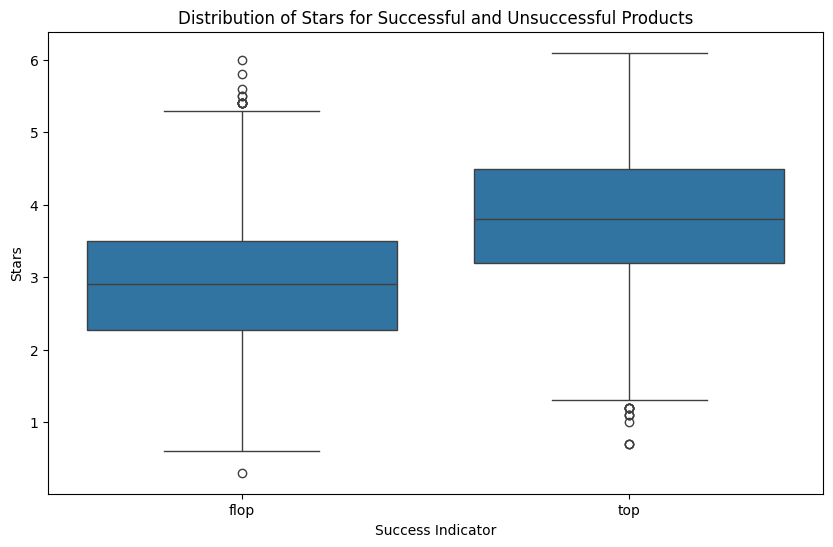

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='success_indicator', y='stars', data=df)
plt.title('Distribution of Stars for Successful and Unsuccessful Products')
plt.xlabel('Success Indicator')
plt.ylabel('Stars')
plt.show()

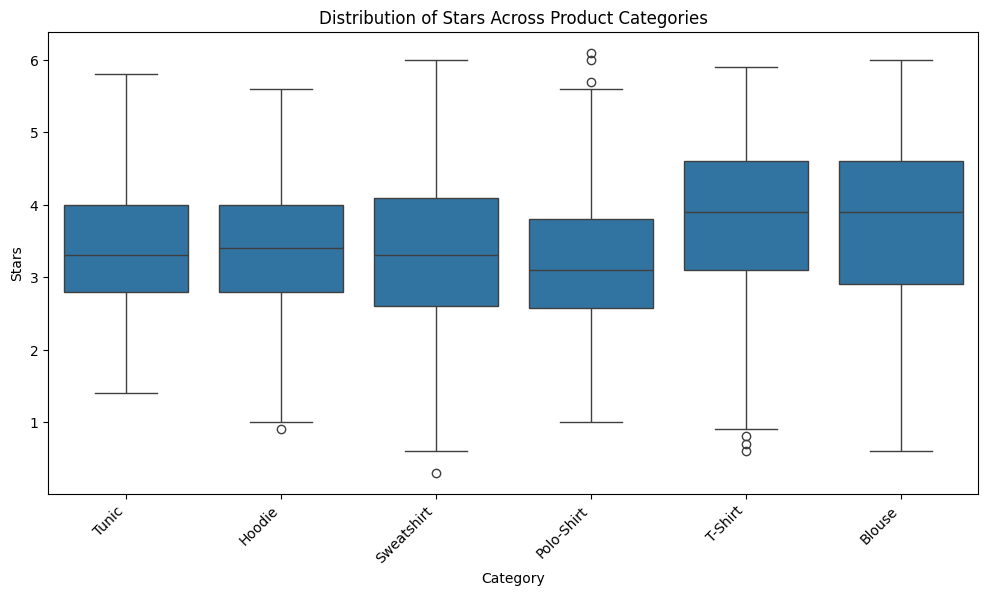

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='stars', data=df)
plt.title('Distribution of Stars Across Product Categories')
plt.xlabel('Category')
plt.ylabel('Stars')
plt.xticks(rotation=45, ha='right')
plt.show()

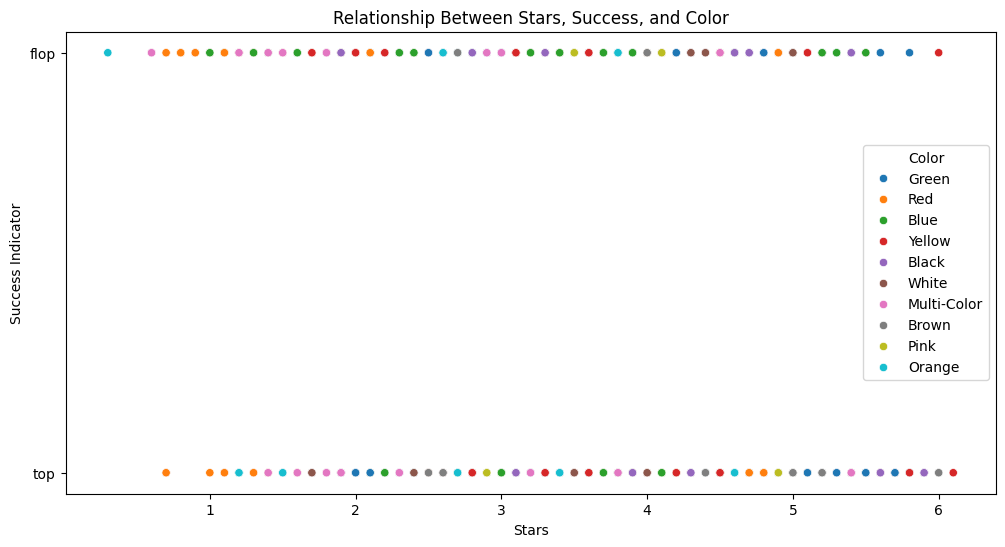

In [85]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='stars', y='success_indicator', hue='color', data=df)
plt.title('Relationship Between Stars, Success, and Color')
plt.xlabel('Stars')
plt.ylabel('Success Indicator')
plt.legend(title='Color')
plt.show()

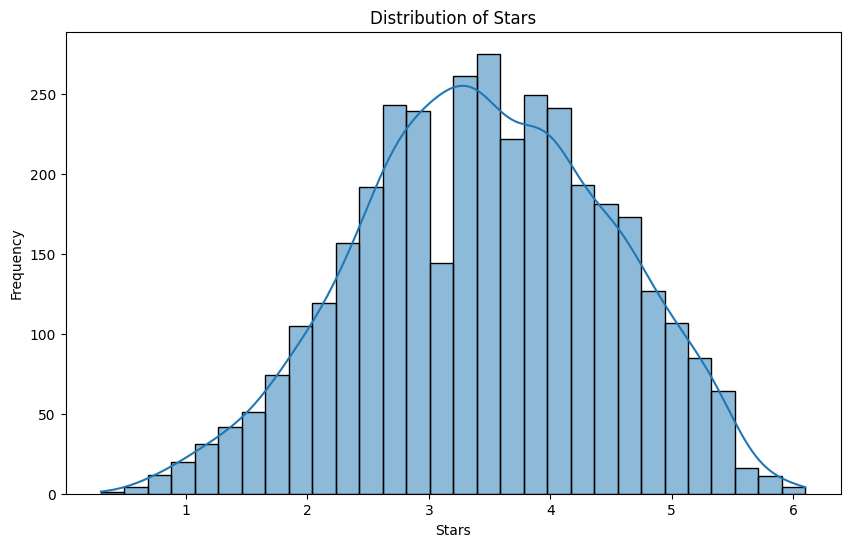

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=30, kde=True)
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

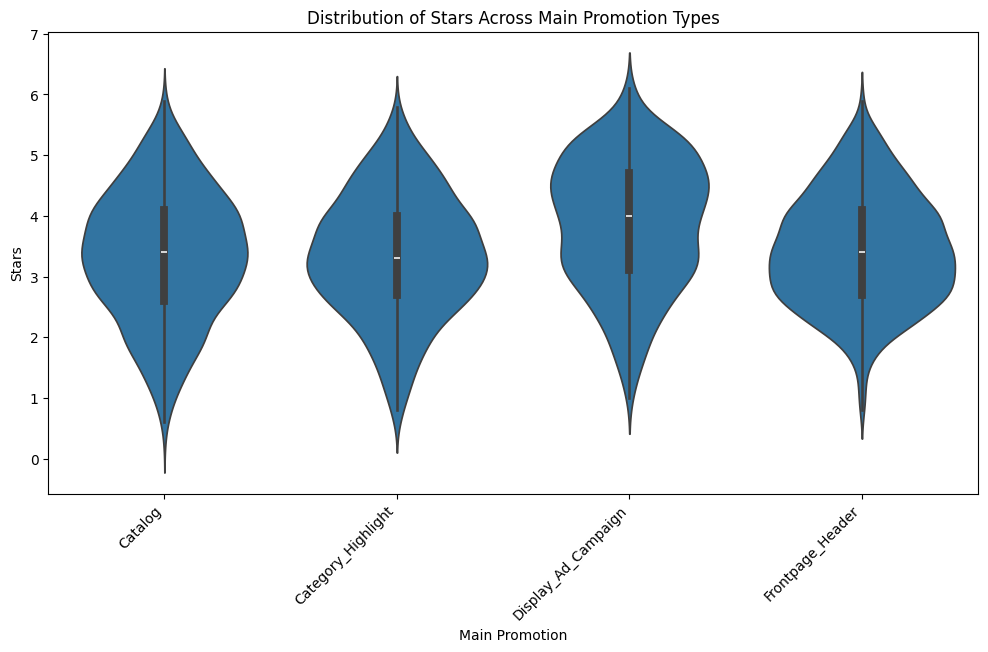

In [87]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='main_promotion', y='stars', data=df)
plt.title('Distribution of Stars Across Main Promotion Types')
plt.xlabel('Main Promotion')
plt.ylabel('Stars')
plt.xticks(rotation=45, ha='right')
plt.show()

Star rating for the items between 4 and 5 have the mostb amount of campaign here

In [89]:
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
df['category'] = labelencoder_df.fit_transform(df['category'])
df['main_promotion'] = labelencoder_df.fit_transform(df['main_promotion'])
df['color'] = labelencoder_df.fit_transform(df['color'])
df['stars'] = labelencoder_df.fit_transform(df['stars'])
df.head()

category  main_promotion  color  stars success_indicator
0         5               0      3     26              flop
1         1               1      7     10              flop
2         3               0      7     39               top
3         2               1      1     26              flop
4         1               1      3     36               top

<ipython-input-90-1a75510edf07>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


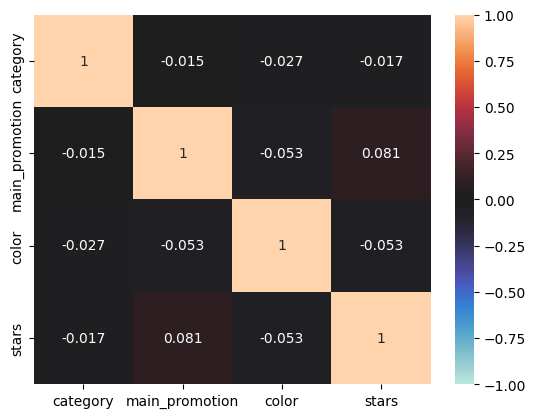

In [90]:
corr_matrix = df.corr()
ax = sns.heatmap(data = corr_matrix, annot = True, vmax = 1, vmin = -1, center = 0)

There is a highest corelation betwwen the mai_promotion and the stars which gives us an idea that the more the promotion more the rating of the products